# Movie Data Cleaning, EDA & Correlation Analysis Project

## Importing libraries and reading csv

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (12,8)


In [72]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

In [75]:
# Check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [77]:
# Check for missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [79]:
# Dropping null values
df.dropna(inplace=True)

In [81]:
df.shape

(5421, 15)

In [82]:
# Converting float values to appropriate integers
df['votes'] = df['votes'].astype(np.int64)
df['budget'] = df['budget'].astype(np.int64)
df['runtime'] = df['runtime'].astype(int)
df['gross'] = df['gross'].astype(np.int64)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [83]:
# Correcting year column (year from released column is more accurate)

In [85]:
df['correct_year'] = [year.split('(')[0] for year in df['released']]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980"


In [89]:
# Ensure the extracted year values are formatted correctly
for year in df['correct_year']:
    if ',' not in year:
        print(year)

1982 
August 1983 
March 1985 
1985 
1987 
May 1988 
May 1988 
January 1991 
November 1991 
September 1994 
May 1994 
1995 
2019 
November 2010 


In [90]:
# Extract year, while dealing with non-standardized values
def extract_year(value):
    if ',' in value:
        return value.split(',')[1].strip()
    else:
        return year.split()[-1]

df['correct_year'] = df['correct_year'].apply(extract_year)

In [93]:
# Converting corrected year column type to int
df['correct_year'] = df['correct_year'].astype(int)

In [95]:
# Dropping the incorrect year column
df.drop(columns=['year'], inplace=True)

In [97]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


## Exploratory Data Ananlysis

In [100]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5421 non-null   object 
 1   rating        5421 non-null   object 
 2   genre         5421 non-null   object 
 3   released      5421 non-null   object 
 4   score         5421 non-null   float64
 5   votes         5421 non-null   int64  
 6   director      5421 non-null   object 
 7   writer        5421 non-null   object 
 8   star          5421 non-null   object 
 9   country       5421 non-null   object 
 10  budget        5421 non-null   int64  
 11  gross         5421 non-null   int64  
 12  company       5421 non-null   object 
 13  runtime       5421 non-null   int32  
 14  correct_year  5421 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(9)
memory usage: 635.3+ KB


In [102]:
# Summary statistics of numerical data
df.describe().astype(np.int64)

,score,votes,budget,gross,runtime,correct_year
count,5421,5421,5421,5421,5421,5421
mean,6,115066,36009170,103229653,108,2001
std,0,184407,41573373,187302717,18,10
min,1,195,6000,309,63,1980
25%,5,19000,10000000,10736401,95,1994
50%,6,52000,21800000,36869414,105,2003
75%,7,129000,45000000,112462508,118,2011
max,9,2400000,356000000,2847246203,271,2020


In [104]:
# Sorting by gross value (desc)
df.sort_values(by='gross', ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [106]:
# Sorting by budget value (desc)
df.sort_values(by='budget', ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,2007


In [108]:
# Set Seaborn theme
sns.set_theme(style='darkgrid', context='notebook')

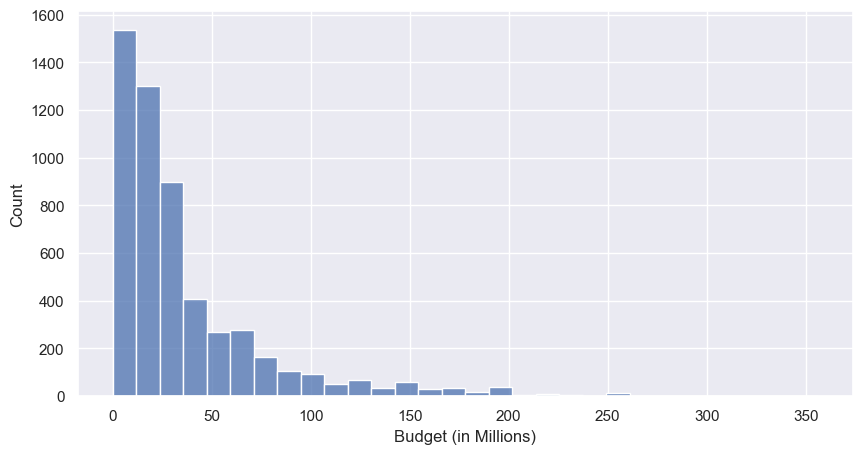

In [110]:
# Budget distribution histogram
plt.figure(figsize=(10,5))
sns.histplot(df['budget']/1e6, bins=30)
plt.xlabel('Budget (in Millions)')
plt.show()

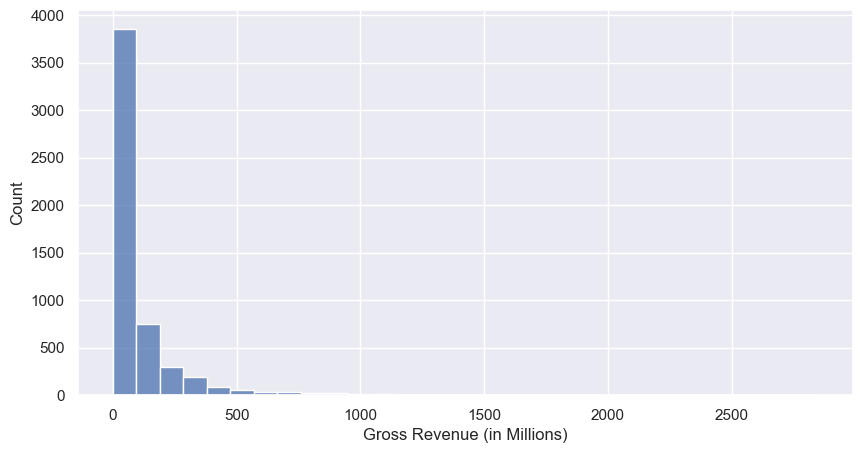

In [111]:
# Gross Revenue distribution histogram
plt.figure(figsize=(10,5))
sns.histplot(df['gross']/1e6, bins=30)
plt.xlabel('Gross Revenue (in Millions)')
plt.show()

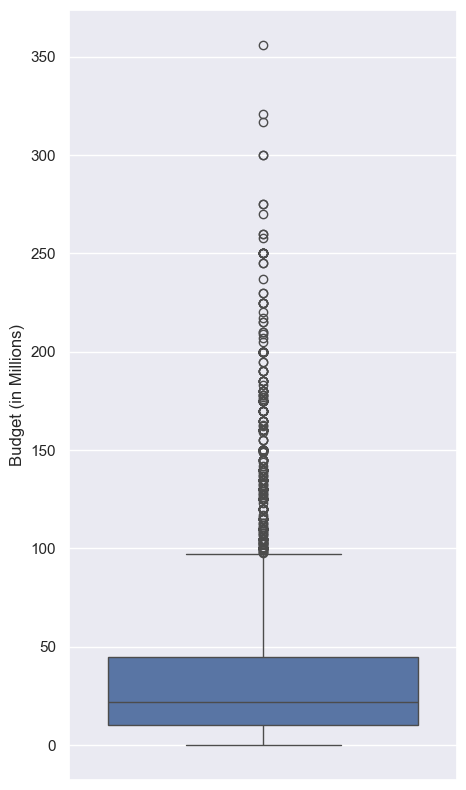

In [112]:
# Budget boxplot
plt.figure(figsize=(5,10))
sns.boxplot(df['budget']/1e6)
plt.ylabel('Budget (in Millions)')
plt.show()

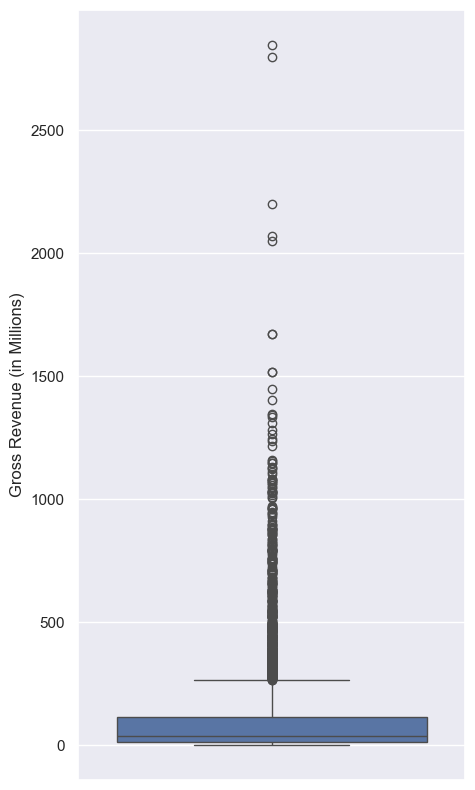

In [113]:
# Gross Revenue boxplot
plt.figure(figsize=(5,10))
sns.boxplot(df['gross']/1e6)
plt.ylabel('Gross Revenue (in Millions)')
plt.show()

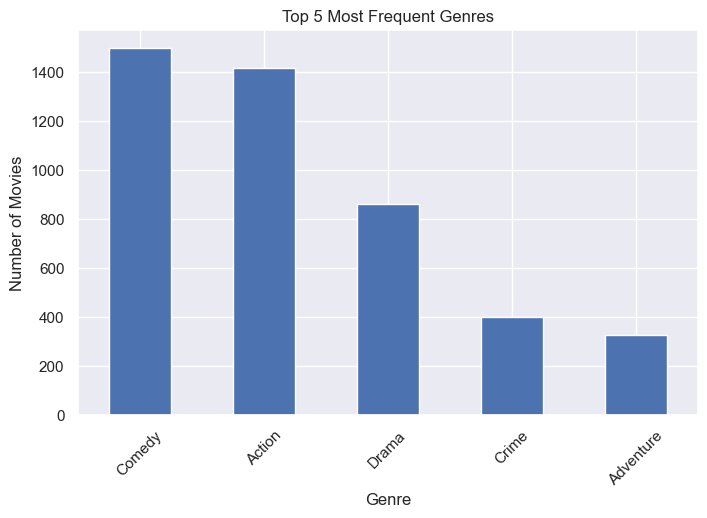

In [115]:
#Top 5 Most Frequent Genres
df['genre'].value_counts().head().to_frame().plot(kind='bar', figsize=(8,5), legend=False)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.title('Top 5 Most Frequent Genres')
plt.show()

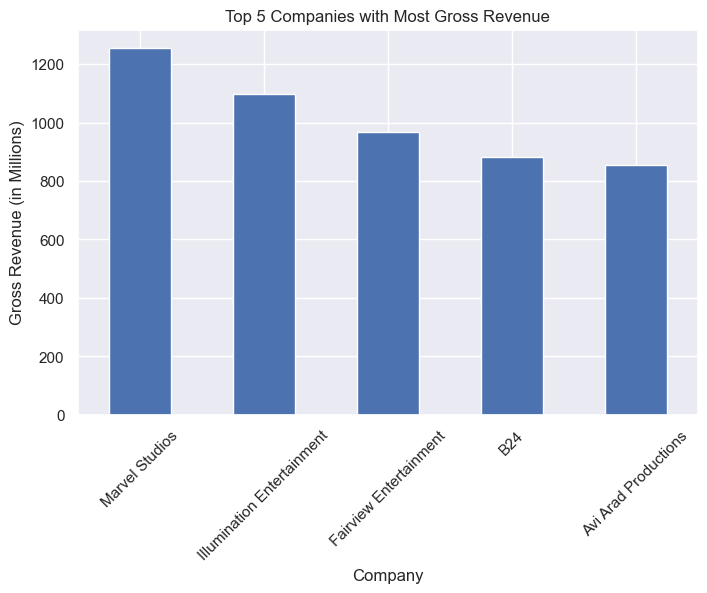

In [116]:
# Top 5 Companies with Most Gross Revenue
plot_df = df.groupby('company')['gross'].mean().to_frame().sort_values(by='gross', ascending=False).head()/1e6
plot_df.plot(kind='bar', figsize=(8,5), legend=False)
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.ylabel('Gross Revenue (in Millions)')
plt.title('Top 5 Companies with Most Gross Revenue')
plt.show()

## Correlation Analysis

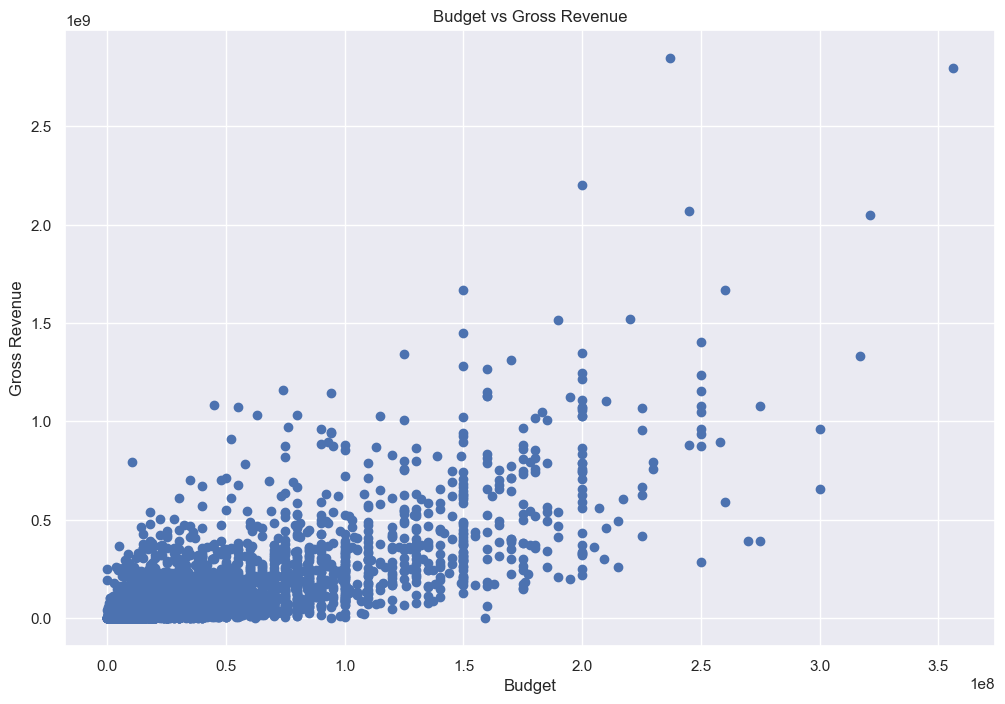

In [119]:
# Scatter plot: Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

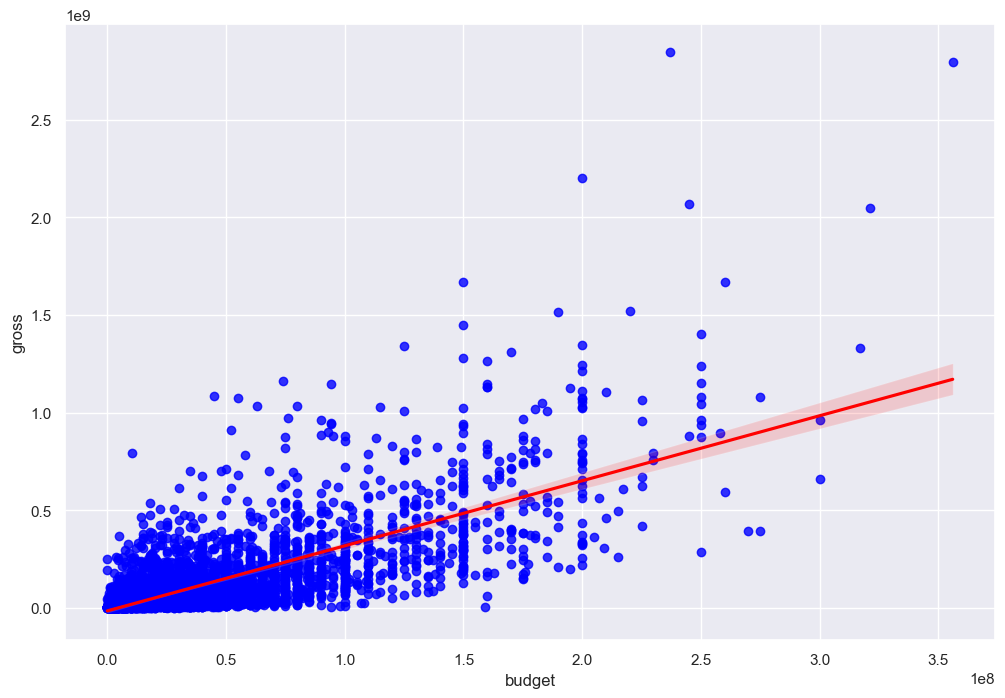

In [120]:
# Regression plot: Budget vs Gross Revenue
sns.regplot(x=df['budget'], y=df['gross'], data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.show()

In [122]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,score,votes,budget,gross,runtime,correct_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.059816
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.198746
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.314944
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.264581
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.073234
correct_year,0.059816,0.198746,0.314944,0.264581,0.073234,1.000000


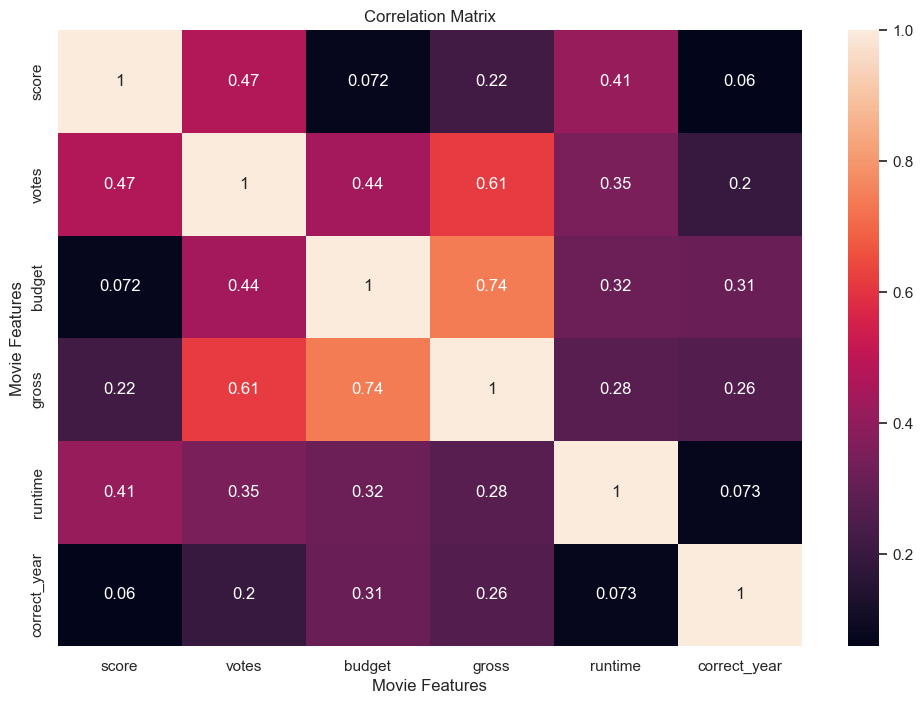

In [124]:
# Heatmap to visualize correlations between numeric features
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

### Conclusion: Votes & Budget have the highest correlation to Gross Revenue.